In [33]:
from aicsimageio import AICSImage

file_name = "28.lif"

img = AICSImage(file_name)
img.dims.order  # T, C, Z, big Y, big X, (S optional)
img.dask_data  # Dask chunks fall on tile boundaries, pull YX chunks out of the image

dask.array<transpose, shape=(1, 4, 10, 2048, 2048), dtype=uint16, chunksize=(1, 1, 10, 2048, 2048), chunktype=numpy.ndarray>

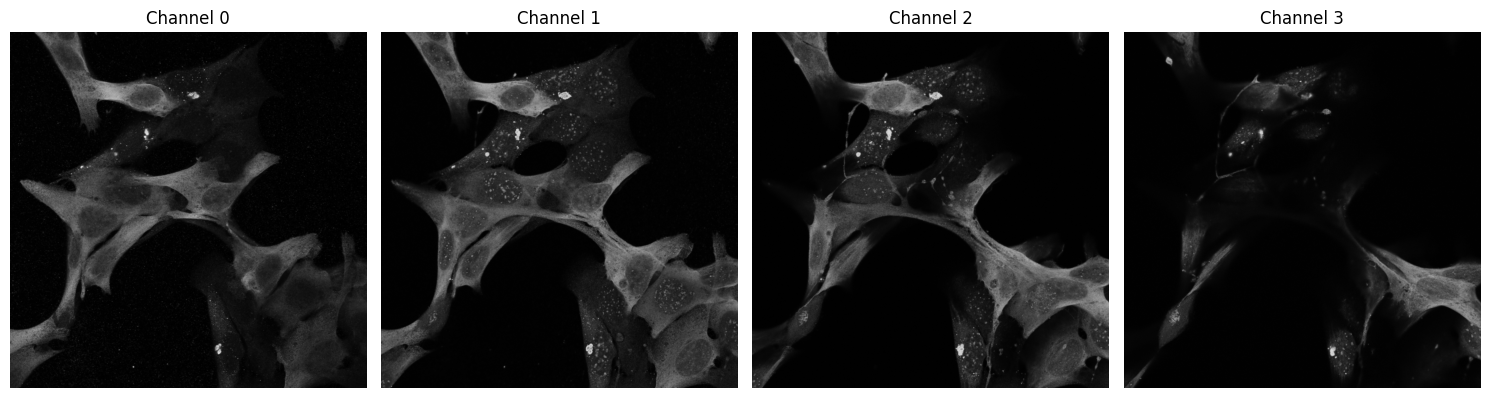

In [48]:
import matplotlib.pyplot as plt

# Create a max projection along the Z axis for the first timepoint and all channels
max_proj_img = data[0, :, :, :, :].max(axis=1)  # shape: (4, 2048, 2048)

# Show the max projection for each channel
fig, axes = plt.subplots(1, C, figsize=(15, 5))
for i in range(C):
    axes[i].imshow(max_proj_img[i], cmap='gray')
    axes[i].set_title(f'Channel {i}')
    axes[i].axis('off')
plt.tight_layout()
plt.show()

import tifffile
from skimage.exposure import rescale_intensity

# Select channel 1 (index 1)
channel_1 = max_proj_img[1]

# Optional: normalize to 8-bit for standard image viewing
channel_1_uint8 = rescale_intensity(channel_1, out_range=(0, 255)).astype(np.uint8)

# Save to a TIFF file
tifffile.imwrite("channel_1_max_projection.tiff", channel_1_uint8)

In [47]:
import numpy as np
from aicsimageio import AICSImage
from skimage.exposure import rescale_intensity
from skimage.transform import resize
import tifffile

# Load the .lif file
img = AICSImage("28.lif")
data = img.get_image_data("TCZYX")  # shape: (1, 4, 10, 2048, 2048)

# Max project along Z: result shape (1, 4, 2048, 2048)
max_proj = data.max(axis=2)

# Combine channels: average across channels
combined = max_proj[0].mean(axis=0)  # shape: (2048, 2048)

# Optional: normalize and convert to 8-bit
combined_uint8 = rescale_intensity(combined, out_range=(0, 255)).astype(np.uint8)

# Save to a single-page TIFF
tifffile.imwrite("28.tiff", combined_uint8)